<a href="https://colab.research.google.com/github/keerthishree20/projects-/blob/main/Gold_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection

In [4]:
# loading the csv data to a pandas Dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [8]:
# printint the first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.shape

(2290, 6)

In [9]:
# printing the last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# getting some basics information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [12]:
# Statistical Measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1.Positive Correlation

2.Negative Correlation

In [17]:
correlation = gold_data.select_dtypes(include='number').corr()

<Axes: >

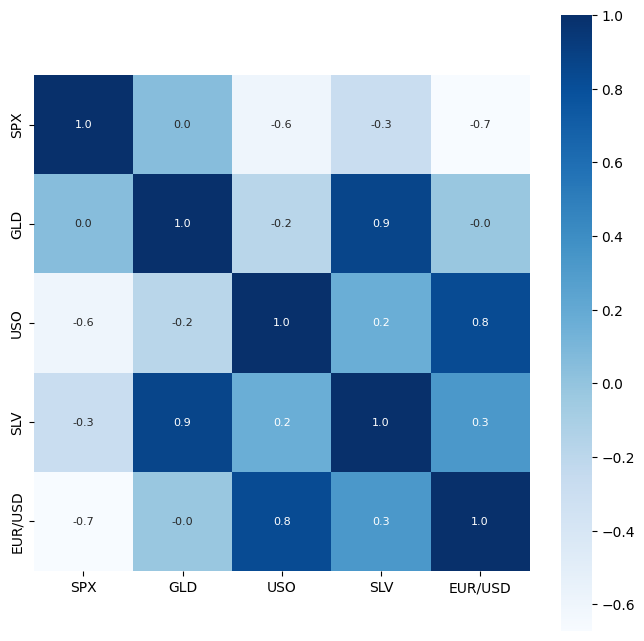

In [18]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')


In [19]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

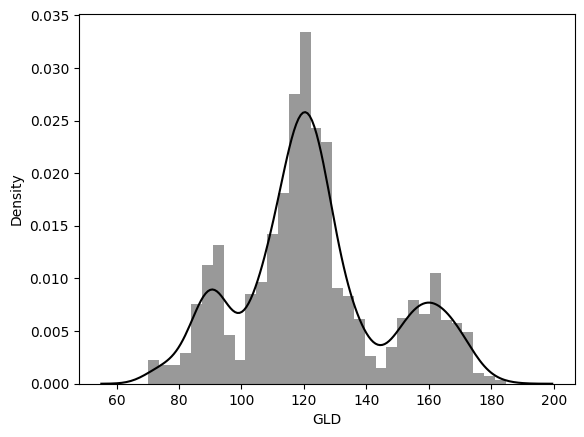

In [22]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='black')

Splitting the Features and Target

In [23]:
X = gold_data.drop(['Date','GLD'],axis=1)   #drpping the column axis = 1
Y = gold_data['GLD']

In [24]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [25]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training
Random Forest Regression

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
# traing the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [30]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[168.71969942  81.89430004 116.10360024 127.66640047 120.97520119
 154.60939847 150.65219873 126.02200062 117.54109872 125.80050088
 116.58430124 171.76620085 141.63679816 167.62249773 115.0572003
 117.7481007  140.40380294 170.00570076 159.10370248 157.86959962
 155.0073     125.38920021 176.53339896 157.47240314 125.1370004
  93.74519973  78.0727002  120.76709998 119.16069955 167.61020004
  88.17130028 125.11840046  90.96440051 117.54900007 121.10479954
 136.11300054 115.58810122 115.06820081 147.29289983 107.20240086
 104.50420279  87.26549798 126.51590052 118.20909978 153.39839933
 119.51740031 108.26120038 108.30789832  93.27330079 127.09839807
  75.36150041 113.62579856 121.27070025 111.26039927 118.85779893
 120.80019929 159.11320001 168.71620098 146.95079695  86.03509903
  94.52600037  86.72389892  90.48850004 118.90490088 126.43250078
 127.58369999 170.11400019 122.34249939 117.26009903  99.10170071
 168.40020248 142.91949807 131.96990243 121.23080236 121.36219959
 119.8671004

In [33]:
# R Square Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Square Error : ", error_score)


R Square Error :  0.9896425044876644


Comparing Actual Value and Predicted Value

In [34]:
Y_test = list(Y_test)

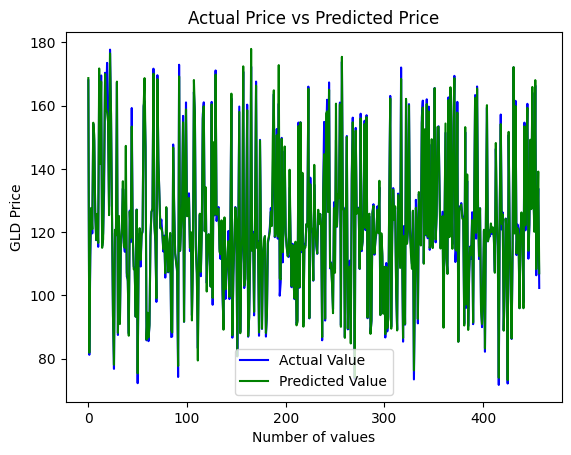

In [38]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()